In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\Files-main\titanic_train.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape  #checking row and columns

(891, 13)

In [4]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [5]:
#parch has only zeros value we removed this column

In [6]:
data.drop(columns=['Unnamed: 0','PassengerId','Cabin','Name','Ticket',],axis=1,inplace=True) # droping unwanted column

In [7]:
data.head() #check column removed or not

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
data.isna().sum()  #checking null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
#from above we observation that age and cabin ,embarked has null values in data set

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
# fill nan values
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Age']=data['Age'].fillna(data['Age'].mean())

In [12]:
data.isna().sum()  #checking null values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
data.info() # cheking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
# we find all are intiger,intiger,and  float data 

In [15]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['Sex', 'Embarked']


numerical= ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Analysis (EDA)

In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# cheking stats of dataset
# in the above observation we find some skewness in some column
# no null values present in data set
# there is huge difference between min and 25% thats mean there is outler present in dataset
# here is std is high in  ,Age,SibSp ,Parch ,Fare.

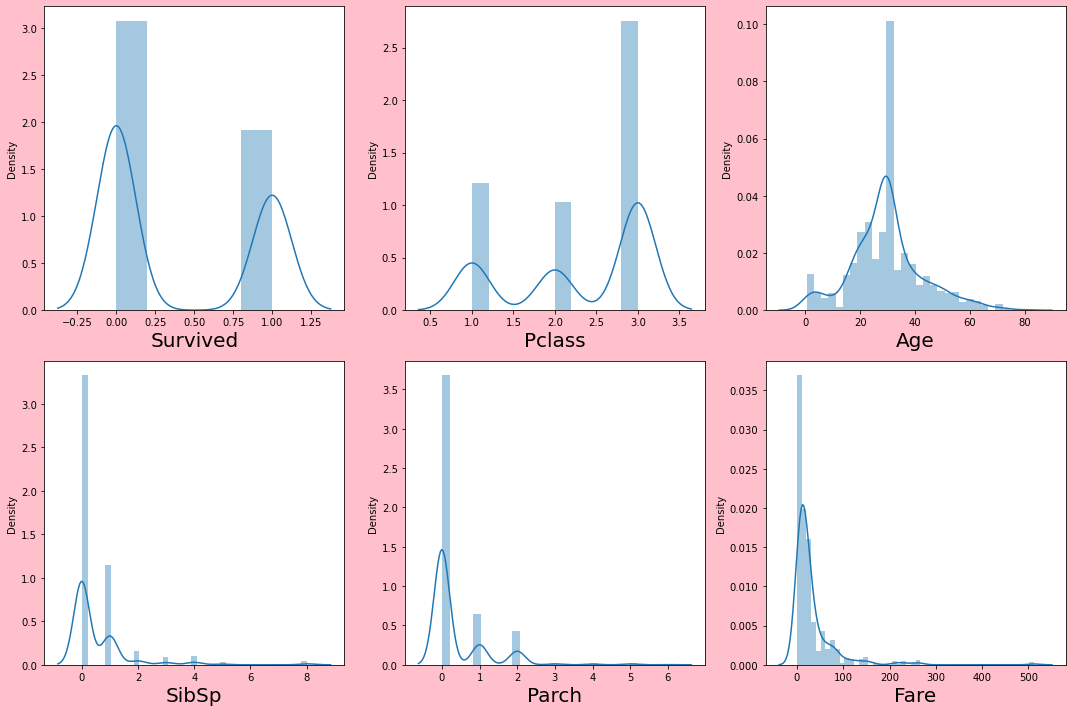

In [18]:
#cheking ditribution of plot
plt.figure(figsize=(15,10),facecolor='pink')
plotnumber=1
for column in numerical:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [19]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

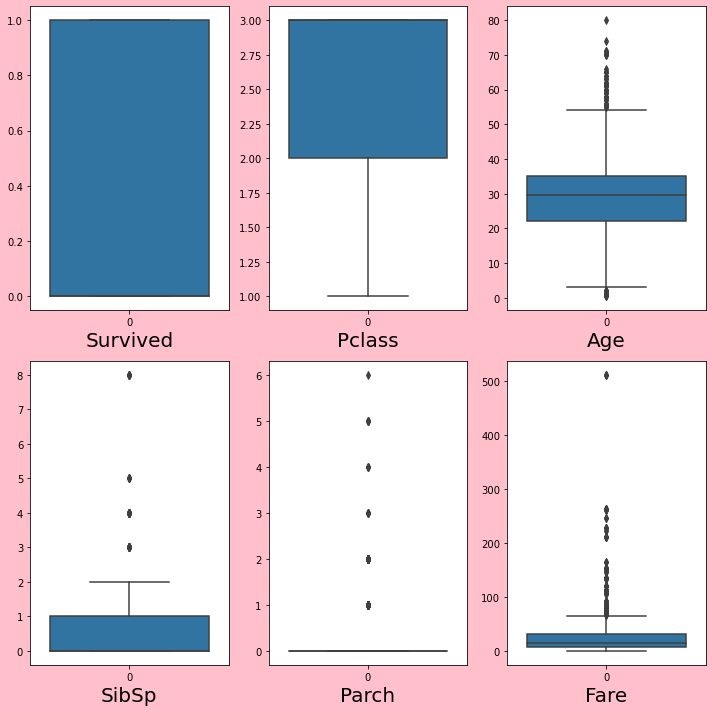

In [20]:
#cheking ditribution of plot
plt.figure(figsize=(10,10),facecolor='pink')
plotnumber=1
for column in numerical:     # we checks for continous data
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [21]:
# here fare ,parch,sibsp and age has some outliers

# finding IQR to identify outliers

In [22]:
# 1st quantile
q1=data.quantile(0.25)

# 3rd quantile
q3=data.quantile(0.75)
iqr=q3-q1

In [23]:
iqr

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64

# Removing outliers for age and fare bcz these are continious column

In [24]:
Age_high=(q3['Age'] +(1.5*iqr['Age']))  #checking  validating or outlier 
print(Age_high)
a=np.where(data['Age']>Age_high)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

54.5
(849, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,1,female,38.000000,1,0,71.2833,C
2,2,1,3,female,26.000000,0,0,7.9250,S
3,3,1,1,female,35.000000,1,0,53.1000,S
4,4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
844,886,0,2,male,27.000000,0,0,13.0000,S
845,887,1,1,female,19.000000,0,0,30.0000,S
846,888,0,3,female,29.699118,1,2,23.4500,S
847,889,1,1,male,26.000000,0,0,30.0000,C


In [25]:
# for low side
Age_low=(q1['Age'] - (1.5*iqr['Age']))  # for low side 
print(Age_low)
a=np.where(data['Age']<Age_low)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

2.5
(825, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,1,female,38.000000,1,0,71.2833,C
2,2,1,3,female,26.000000,0,0,7.9250,S
3,3,1,1,female,35.000000,1,0,53.1000,S
4,4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
820,886,0,2,male,27.000000,0,0,13.0000,S
821,887,1,1,female,19.000000,0,0,30.0000,S
822,888,0,3,female,29.699118,1,2,23.4500,S
823,889,1,1,male,26.000000,0,0,30.0000,C


In [26]:
SibSp_high=(q3['SibSp'] +(1.5*iqr['SibSp']))  #checking  validating or outlier 
print(SibSp_high)
a=np.where(data['SibSp']>SibSp_high)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

2.5
(786, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,1,female,38.000000,1,0,71.2833,C
2,2,1,3,female,26.000000,0,0,7.9250,S
3,3,1,1,female,35.000000,1,0,53.1000,S
4,4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
781,886,0,2,male,27.000000,0,0,13.0000,S
782,887,1,1,female,19.000000,0,0,30.0000,S
783,888,0,3,female,29.699118,1,2,23.4500,S
784,889,1,1,male,26.000000,0,0,30.0000,C


In [27]:
Parch_high=(q3['Parch'] +(1.5*iqr['Parch']))  #checking  validating or outlier 
print(Parch_high)
a=np.where(data['Parch']>Parch_high)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

0.0
(642, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
637,884,0,3,male,25.0,0,0,7.0500,S
638,886,0,2,male,27.0,0,0,13.0000,S
639,887,1,1,female,19.0,0,0,30.0000,S
640,889,1,1,male,26.0,0,0,30.0000,C


In [28]:
Fare_high=(q3['Fare'] +(1.5*iqr['Fare']))  #checking  validating or outlier 
print(Fare_high)
a=np.where(data['Fare']>Fare_high)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

65.6344
(577, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,2,1,3,female,26.000000,0,0,7.9250,S
2,3,1,1,female,35.000000,1,0,53.1000,S
3,4,0,3,male,35.000000,0,0,8.0500,S
4,5,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
572,884,0,3,male,25.000000,0,0,7.0500,S
573,886,0,2,male,27.000000,0,0,13.0000,S
574,887,1,1,female,19.000000,0,0,30.0000,S
575,889,1,1,male,26.000000,0,0,30.0000,C


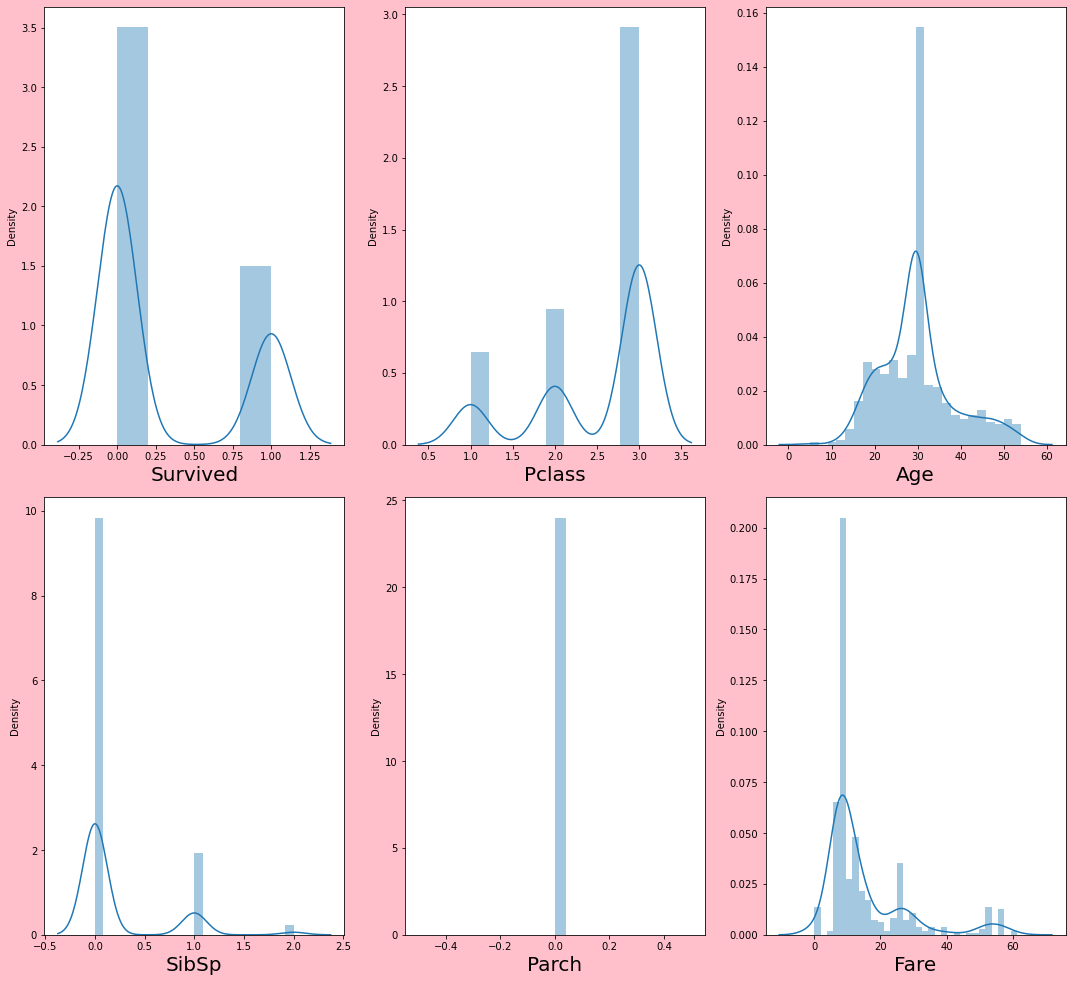

In [29]:
#cheking ditribution of plot
plt.figure(figsize=(15,20),facecolor='pink')
plotnumber=1
for column in numerical:
    if plotnumber<=11:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [30]:
#removing parch bcz it has zeoes valies if we romve multicollinearty problem

In [31]:
data.drop(columns=['Parch'],inplace=True)

# Encoding 

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1.0,22.000000,1,7.2500,2.0
2,1,3,0.0,26.000000,0,7.9250,2.0
3,1,1,0.0,35.000000,1,53.1000,2.0
4,0,3,1.0,35.000000,0,8.0500,2.0
5,0,3,1.0,29.699118,0,8.4583,1.0
...,...,...,...,...,...,...,...
884,0,3,1.0,25.000000,0,7.0500,2.0
886,0,2,1.0,27.000000,0,13.0000,2.0
887,1,1,0.0,19.000000,0,30.0000,2.0
889,1,1,1.0,26.000000,0,30.0000,0.0


In [33]:
# separating features and label
x=data.drop(columns=['Survived'])
y=data['Survived']

In [34]:
x

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,1.0,22.000000,1,7.2500,2.0
2,3,0.0,26.000000,0,7.9250,2.0
3,1,0.0,35.000000,1,53.1000,2.0
4,3,1.0,35.000000,0,8.0500,2.0
5,3,1.0,29.699118,0,8.4583,1.0
...,...,...,...,...,...,...
884,3,1.0,25.000000,0,7.0500,2.0
886,2,1.0,27.000000,0,13.0000,2.0
887,1,0.0,19.000000,0,30.0000,2.0
889,1,1.0,26.000000,0,30.0000,0.0


In [35]:
y

0      0
2      1
3      1
4      0
5      0
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 577, dtype: int64

# cheking relation between features vs label

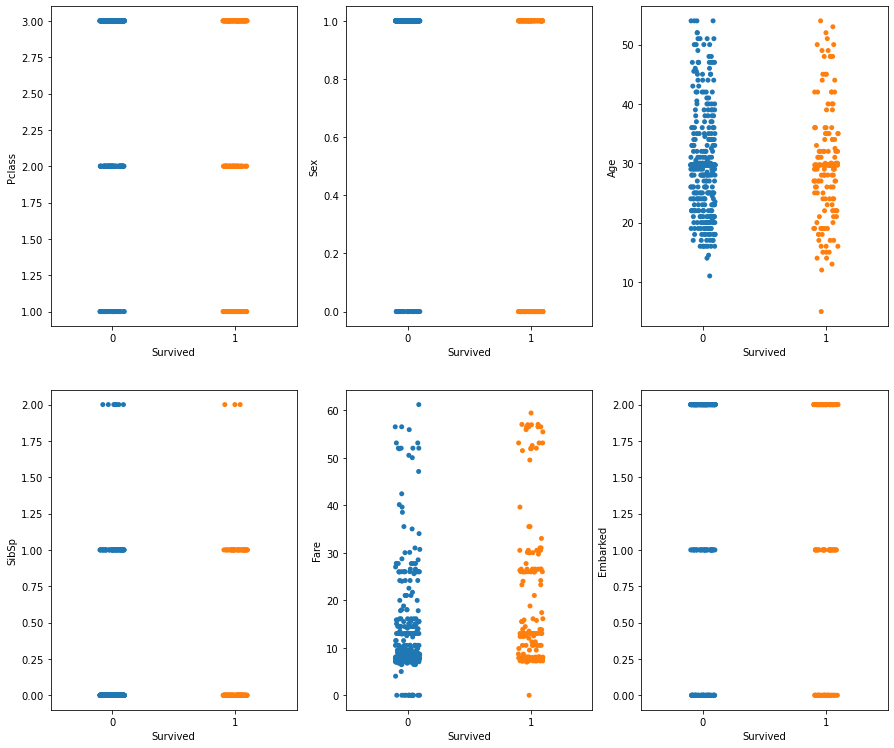

In [36]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()    

# checks multicollinearity problem,and checks relation features vs features

In [37]:
#dtandardaeize the data for remove biasness
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [38]:
x_scaled.shape[1]

6

In [39]:
cheking correlation betwen features vs features
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range  (x_scaled.shape[1])]
vif['features']=x.columns
vif

SyntaxError: invalid syntax (3422251405.py, line 1)

In [ ]:
# if vif grater than 5 in this data then there is multicollinearity problem¶

In [ ]:
#training the data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

# pre-processing steps completed¶

# model buliding

In [ ]:
# importing model LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

In [ ]:
y_pred=log_reg.predict(x_test)  # predicting on test data
y_pred

# model accuracy

In [ ]:
#model accuracy
accuracy=accuracy_score(y_test,y_pred)   #always actual vs prediction
accuracy

In [ ]:
# here our model accuracy is 77% which good percentage

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

# cheking some prediction

In [ ]:
data.head(2)

In [ ]:
#since we have already fit ,now we have only to transform data
print('survived or not: ',log_reg.predict(scaler.transform([[3,1.0,22.0,1,7.250,2.0]]))) 

# model buliding compeleted